Task-7A: Please explain the kernel density algorithm with respect to how it works and please provide examples from the internet for the potential practical uses of this algorithm.

Kernel Density Estimation (KDE) is a linear flattened version of a histogram graph estimated from the dataset. In this algorithm, a continuous curve (kernel / kernel) is drawn for each observation (point). All these curves drawn are added together to make a single uniform density estimation. While doing this addition, it also tries to soften the data (data smoothing).

It can actually be defined as a nonparametric method used to estimate the density function of a random variable. This nonparametric algorithm does not take into account any fundamental distribution that is, it does not assume that the data set has a particular pattern. It uses a kernel function whose purpose is to fit the data along a straight line.

The KDE algorithm is:
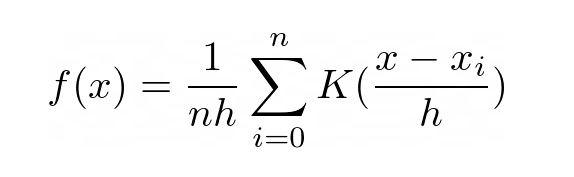

K is the kernel function, n is the number of observations, and x is a particular observation. KDE is essentially the sum of distributions centred around every point in the dataset.
There is also a parameter, h, which is known as bandwith. The bandwith controls the span of the distributions that are places around each part, which in turn affects the smoothening of the distribution.
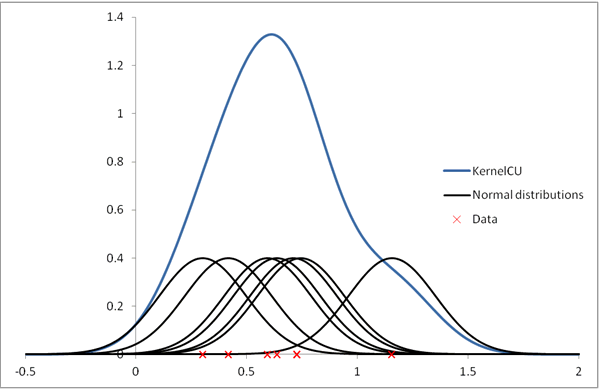

The value chosen for the bandwith is very important as it controls the overall fit to the data. A poorly chosen bandwith value can cause in either over-smoothening or under-smoothening of the estimate. Therefore, this value should be chosen optimally.

there are some general rules for picking a good bandwith value:

- A small dataset requires a higher bandwidth due to lack of data. In this way, more points can be included.

- For a large dataset, it requires a lower band to be chosen, as there are too many points. It requires less span for a good context.

The kernel used in the KDE algorithm is a positive spacing probability density function with a symmetric function. The are of a kernel must be equal to 1. Commonly used kernels; Gaussian, triangular and epanechnikov kernel

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from typing import *

In [3]:
#generating some random data

def generate_random_data(num_points: int, n_randomization: int=3):
    x = np.random.randn(num_points)

    for _ in range(n_randomization):
        random_slice = int(np.random.rand() * num_points)
        x[random_slice:] += np.random.randint(0, 10)

    return x

In [4]:
def kde(bandwith: float, data: List, kernel: Callable):
    mixture = np.zeros(1000)
    points = np.linspace(0, max(data), 1000)
    for xi in data:
        mixture += kernel(points, xi, bandwith)

    return mixture

In [6]:
#gaussian kernel function
def gaussian(x: Any, xi: float, bandwith: float):
    exp_section = np.exp(-np.power(x - xi, 2.0))
    return exp_section / (2 * np.power(bandwith, 2.0))

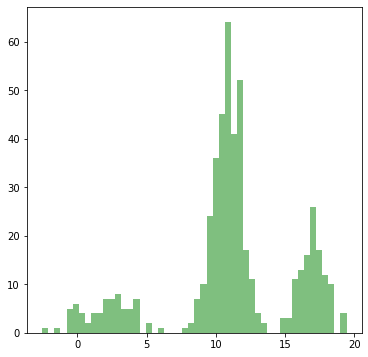

In [32]:
dist = generate_random_data(500)
hist = np.histogram(dist, bins=50)[1]
plt.figure(
    figsize=(6, 6)
)
plt.hist(dist, bins=50, 
         alpha=0.5, color='green', label='True Distribution')
plt.show()

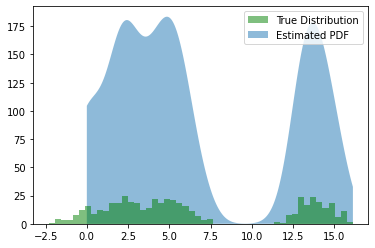

In [31]:
##applying kde

plt.hist(dist, bins=50, 
         alpha=0.5, color='green', label='True Distribution')
points = kde(0.5, dist, gaussian)
plt.fill_between(np.linspace(0, max(dist), 1000), 
                 points, alpha=0.5, label='Estimated PDF')

plt.legend(loc='upper right')
plt.show();

Looking at the graphics, it was seen that the KDE model predicted correctly. This is not a probability density function, because it is much higher than the interval 1. It is necessary to normalize the values in order to make them a probability density function.

In [33]:
# Normalizing
points = kde(0.5, dist, gaussian)
points /= np.abs(points).max(axis=0)  

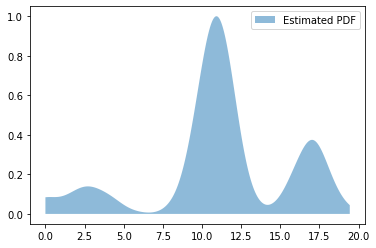

In [34]:
plt.fill_between(np.linspace(0, max(dist), 1000), 
                 points, alpha=0.5, label='Estimated PDF')

plt.legend(loc='upper right')
plt.show()

Task-7B: Please explain the HOG algorithm with respect to the facial detection protocols. Why are they so widely used and what kind of features they can gather? Please find and explain a relevant case related to HOG over the internet.

Histogram of Oriented Gradients (HOG) became widespread in 2005 when Navneet Dalal and Bill Triggs, researchers display their work on HOG, which is a much reliable solution. The algorithm is also a features extractor for the purpose of object detection. Instead of considering the pixel intensities the technique counts the occurrences of gradient vectors represent the light direction to localize image segments. The method uses overlapping local contrast normalization to improve accuracy.

One thing that differentiates HOG from others is that it is still heavily used today with fantastic results.The Histogram of Oriented Gradients method is mainly utilized for face and image detection to classify images. 

1st step: Feature Descriptors
Feature descriptors represent an image that strives only useful information and ignores unnecessary information in the image. HOG property descriptors convert the display to (width x height x channels) n property vector. These images can also be used in the SVM classification algorithm. It does this using histograms of gradients used as properties of an image while sorting unnecessary information. 


Task-7C: Please explain the regularization methods for linear regression by providing concrete examples. Please find and explain a relevant case related to regularization over the internet.

Regularization is a technique used in regression to reduce the complexity of the model and reduce the coefficients of independent variables. In other words, it is one of the methods used to prevent the model from being overfitted.

Regularization puts a limitation on the coefficients of the variables in the model. The difference between the coefficients tends to be higher in a complex model. A high coefficient means that that variable is much more important to the model. This indicates that the algorithm is trying to model complex relationships to predict. The problem is much greater when the coefficients get bigger. This may cause the variance to increase and the model to be overfit.

There are two main types of regularization: Ridge and LASSO.Both add a penalty term to the model. Both methods include a lambda parameter that decides how important the penalty is based on the squared error term.
The higher the penalty, the higher the lambda value and thus the size of the coefficients is reduced.

1. Ridge Regression (L2 Regularization)
2. LASSO Regression ( L1 Regularization)

 Ridge Regression (L2 Regularization)
 
 Ridge regression is a method used to analyze data that suffers from multiple multi-collinearity.
 Ridge regression adds a penalty (L2 penalty) to the function that is equivalent to the square of the magnitude of the coefficients.
 the model will generate a different coefficient estimate for each lambda value. As the lambda value increases, the model complexity will decrease.Even if this reduces the model's overfitting, higher values ​​may be insufficient. Choosing the lambda value is important in order to avoid the bias-variance trade-off. The method used for this is cros-validation. Among the values produced by this method, the best lambda value is chosen. Even if the best lambda value is very close to zero, they will never be 0.

LASSO Regression ( L1 Regularization)

The Lasso regression analysis method performs both feature selection and regularization to increase the prediction accuracy of the model.

Unlike ridge regression, lasso regression, which means least absolute shrinkage, also allows feature selection by forcing the coefficients of features to zero when the penalty is large enough.

This method has the following disadvantage that when the model has correlated variables, it only keeps one variable and sets the other correlated variables to zero. This can result in loss of information and result in lower model accuracy.

In short, it adds an L1 penalty equivalent to the magnitude of the coefficients to the function. This L1 penalty forces some coefficients to be exactly equal to zero when the regularization parameter λ is large enough. This also helps feature selection and shrinks the coefficients of remaining features to reduce model complexity, thus preventing overfitting.

LASSO regresyonu, L1 Düzenlemesi (L1 cezası) olarak da bilinir.
Özetlemek gerekirse, LASSO regresyonu, daha az önemli özelliklerin katsayılarını sıfıra dönüştürür, bu gerçekten özellik seçimine yardımcı olur ve model karmaşıklığını azaltmak için kalan özelliklerin katsayılarını küçültür, dolayısıyla aşırı uydurmayı önler.


Kısa özetlemek gerekirse, fonksiyona katsayıların büyüklüğüne eşdeğer bir L1 cezası ekler. Bu L1 cezası, regularization parameter λ yeterince büyük olduğunda bazı katsayıları tam olarak sıfıra eşit olmaya zorlar. Bu sayede özellik seçimine de yardımcı olur ve model karmaşıklığını azaltmak için kalan özelliklerin katsayılarını küçültür, dolayısıyla aşırı uydurmayı önler

Task-7D: Please explain the Random Forest algorithm in detail with respect to its working principles and please explain its advantages and disadvantages over a concrete example that you find on the internet.

Random Forest algorithm is a supervised classification algorithm.
It consists of a large number of individual decision trees. Each working decision tree generates a class estimate. The decision tree with the highest number of votes is chosen as the best for the output of the model.
The difference between Random Forest algorithm and the decision tree algorithm is that in Random Forest, the process of finding the root node and splitting the feature nodes will run randomly.
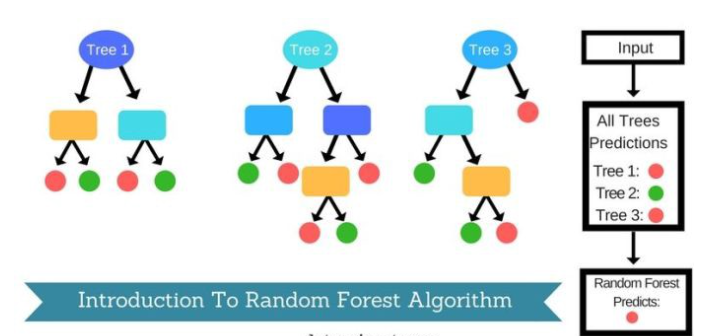

Random Forest is one of the most popular and most powerful machine learning algorithms which is a type of ensemble machine learning algorithm called Bootstrap Aggregation or Bagging.  

This model of trees is also called an ensemble. The ensemble returns a class prediction based on the votes of the base classifiers.
Random Forest is one of the most popular and most powerful machine learning algorithms which is a type of ensemble machine learning algorithm called Bootstrap Aggregation or Bagging.  
Bagging (Bootstrap Aggregation) is a simple ensemble method. It can be used to reduce model's variance. High variance means that the model is overfitted. For example, decision trees usually have high variance. Bagging offers a solution for this high variance problem. It can reduce overfitting by taking an average of several decision trees. Bagging method uses bootstrap sampling and puts together decision trees by averaging them to predict the result.
Bootstrap sampling means sampling rows at random from the training dataset with replacement.


The accuracy of a random forest depends on the strength of the individual decision tree classifiers and a measure of the dependence between them.
Advantages: 
Compared with other classification techniques, there are three advantages:
-	In classification problems, Random Forest algorithm avoid the overfitting problem.
-	The same random forest algorithm can be used for both classification and regression task.
-	Random forest algorithm enables selection of features that will contribute to the model from the dataset, feature engineering.
-	Because a subset of properties is worked on in the model, it is faster to train data than decision trees. Thus, it can work quickly with hundreds of features.
-	Each decision tree included in the model has high variance but low bias. Since all trees are averaged in the random forest algorithm, the variance is also averaged. In this way, the model turns into a low bias and medium variance structure.

Disadvantages: 
-	Random forest models are not completely interpretable.
-	For very large data, the size of the trees is also very large and can take up a lot of memory.
-	Since the model has a high tendency to overfit, the most suitable hyperparameters should be selected for the model.
